# Exercise 6 - Code

In [91]:
import networkx as nx
import numpy as np
import random
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)

path = "../data/"

## Problem 1
*Simulate a targeted attack for*

- *nodes sorted by betweeness centrality and*
- *nodes sorted by closeness centrality.*

*Plot the results together with the degree attack to judge which kind of attack leads to the most vulnerable results.*

In [142]:
def attack(G, m=1, kind="degree"):
    N = len(G)
    if N % m == 0:
        n_steps = N // m - 1
    else:
        n_steps = N // m
    steps = np.arange(n_steps + 2)

    C = G.copy()
    proportions = np.zeros(n_steps + 2)
    proportions[0] = 1

    for step in steps[:-2]:
        if kind == "degree":
            centers = sorted(C.nodes, key=C.degree, reverse=True)
        elif kind == "betweenness":
            centers = sorted(C.nodes, key=nx.centrality.betweenness_centrality(C).get, reverse=True)
        elif kind == "closeness":
            centers = sorted(C.nodes, key=nx.centrality.closeness_centrality(C).get, reverse=True)

        if kind == "random":
            C.remove_nodes_from(random.sample(list(C.nodes), m))
        else:
            C.remove_nodes_from(centers[:m])

        core = max(nx.connected_components(C), key=len)
        proportions[step+1] = len(core) / N

    return steps, proportions

In [149]:
enron = nx.read_edgelist(path + 'ia-enron-only/ia-enron-only.edges', nodetype=int)
m = 1
kinds = ["degree", "betweenness", "closeness", "random"]

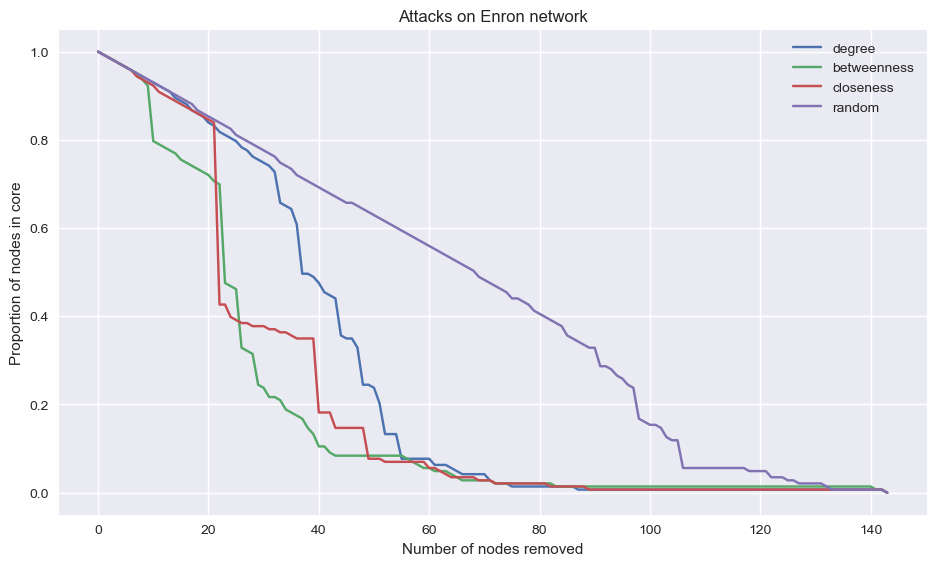

In [150]:
for kind in kinds:
    steps, proportions = attack(enron, m=m, kind=kind)
    plt.plot(m*steps, proportions, label=kind)

plt.title("Attacks on Enron network")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.legend()
plt.show()

## Problem 2

*Simulate targeted attacks against the power grid of the American states in the west and find the most vulnerable nodes. First compare the set of the 5 highest-degree-nodes with the set of the highest-closeness-nodes. What do you notice?  Plot the results in the same way as above together with the random failure curve.*

In [151]:
powergrid = nx.read_edgelist(path + 'powergrid.edgelist.txt')
m = 100
kinds = ["degree", "betweenness", "closeness", "random"]

In [152]:
k = 5

highest_degree_nodes = sorted(powergrid.nodes, key=powergrid.degree, reverse=True)
print("degree:", highest_degree_nodes[:k])

highest_betweenness_nodes = sorted(powergrid.nodes, key=nx.centrality.betweenness_centrality(powergrid).get, reverse=True)
print("betweenness:", highest_betweenness_nodes[:k])

highest_closeness_nodes = sorted(powergrid.nodes, key=nx.centrality.closeness_centrality(powergrid).get, reverse=True)
print("closeness:", highest_closeness_nodes[:k])

degree: ['2553', '4458', '831', '3468', '4345']
betweenness: ['4164', '2543', '1243', '4219', '2528']
closeness: ['1308', '2594', '2605', '1131', '2606']


There is no overlap between the 5 highest nodes of each centrality measure.

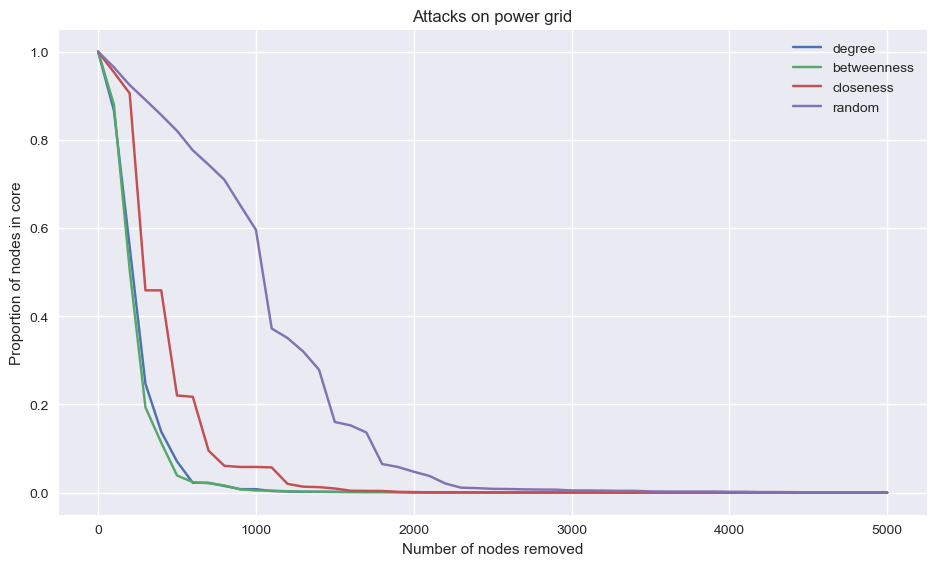

In [153]:
for kind in kinds:
    steps, proportions = attack(powergrid, m=m, kind=kind)
    plt.plot(m*steps, proportions, label=kind)

plt.title("Attacks on power grid")
plt.xlabel("Number of nodes removed")
plt.ylabel("Proportion of nodes in core")
plt.legend()
plt.show()

## Problem 3

*Write a function that generates a Cayley tree.*

In [104]:
def cayley_tree(k, h):
    if h == 0:
        return nx.trivial_graph()
    elif h == 1:
        return nx.star_graph(k)
    else:
        G = nx.star_graph(k)
        H = nx.balanced_tree(k-1, h-1)
        N = len(H)
        for i in range(k):
            n = (i+1)*N
            H = nx.convert_node_labels_to_integers(H, first_label=n)
            H = nx.relabel_nodes(H,{n:i+1})
            G = nx.compose(G, H)
        return G

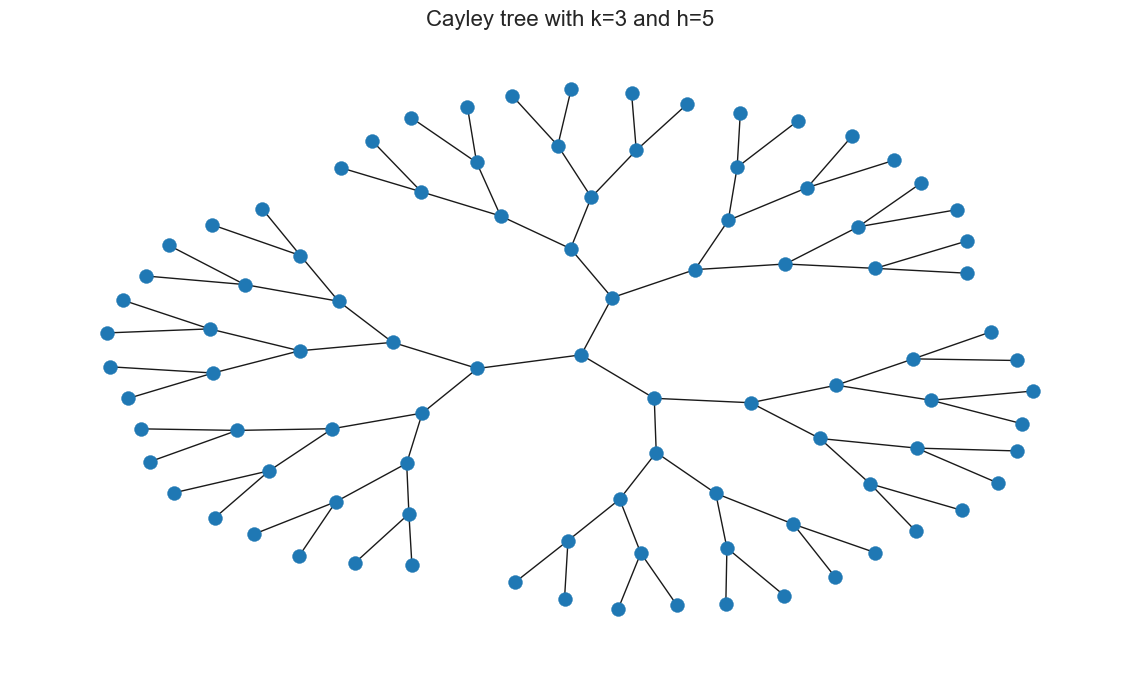

In [110]:
k = 3
h = 5
G = cayley_tree(k, h)

nx.draw_kamada_kawai(G, node_size=100)
ax = plt.gca()
ax.set_title(f"Cayley tree with k={k} and h={h}", fontsize=16)
plt.show()